# Medical Cost Personal Datasets

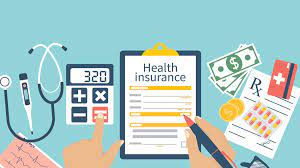

The aim of this analysis is to investigate a range of health-related factors and their interconnections to predict individual medical costs billed by health insurance accurately. These factors include aspects such as age, gender, body mass index (BMI), number of children, smoking status, and region. This comprehensive examination will not only provide insights into the patterns and trends in health insurance charges but will also create a solid base for further research. Specifically, research can be built on how these variables interact and influence the cost of health insurance, crucial knowledge for improving insurance policy design and outcomes in this increasingly critical area of healthcare.

### Import Liabraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Scikit Learn

from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.metrics import *
from sklearn.linear_model import LinearRegression,Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder   ### onrhot convert 0&1
from sklearn.compose import ColumnTransformer#### col tranform
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
import joblib
import datetime 

## Statsmodel
import statsmodels.api as sm

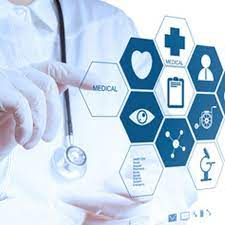

### Loading the Dataset

In [2]:
df= pd.read_csv(r"C:\Users\Nikhil Nandugade\Downloads\insurance LR.csv")

### Basic Checks

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.9240
1,18,male,33.770,1,no,southeast,1725.5523
2,28,male,33.000,3,no,southeast,4449.4620
3,33,male,22.705,0,no,northwest,NaN
4,32,male,28.880,0,no,northwest,3866.8552


In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
pd.DataFrame(list(df)) 

,0
0,age
1,sex
2,bmi
3,children
4,smoker
5,region
6,charges


### Domain Analysis

***age: age of primary beneficiary***

***sex: insurance contractor gender, female, male***

***bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9***

***children: Number of children covered by health insurance / Number of dependents***

***smoker: Smoking***

***region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.***

***charges: Individual medical costs billed by health insurance***

In [6]:
df.shape

(1338, 7)

In [7]:
df.size

9366

### Check for Information & Data type 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1329 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1334 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df.describe(include=["O"])  #### Statistical parameters of Categorical columns

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [10]:
df.describe()  #### Statistical parameters of Numerical columns

,age,bmi,children,charges
count,1338.000000,1329.000000,1338.000000,1334.000000
mean,39.207025,30.645820,1.094918,13272.989905
std,14.049960,6.105436,1.205493,12121.743139
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.220000,0.000000,4740.287150
50%,39.000000,30.305000,1.000000,9382.033000
75%,51.000000,34.600000,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
# Handle duplicates
duplicate_rows_data = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (1, 7)


In [12]:
df = df.drop_duplicates()

### Missing value Treatment

In [13]:
df.isnull().sum()

age         0
sex         0
bmi         9
children    0
smoker      0
region      0
charges     4
dtype: int64

<Axes: >

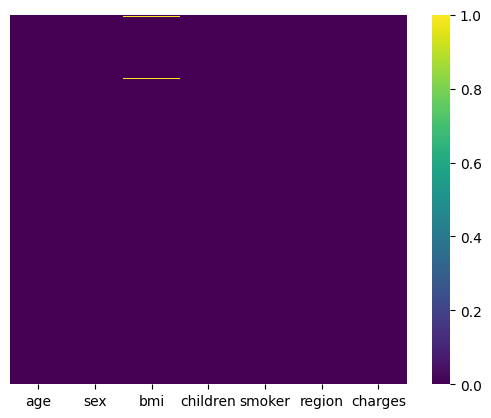

In [14]:
sns.heatmap(df.isnull(),yticklabels= False,cmap="viridis")

### Filling Missing Values

In [15]:
df["bmi"]

0       27.900
1       33.770
2       33.000
3       22.705
4       28.880
         ...  
1333    30.970
1334    31.920
1335    36.850
1336    25.800
1337    29.070
Name: bmi, Length: 1337, dtype: float64

In [16]:
df["bmi"].describe()

count    1328.000000
mean       30.645862
std         6.107736
min        15.960000
25%        26.220000
50%        30.305000
75%        34.618750
max        53.130000
Name: bmi, dtype: float64

In [17]:
df.bmi.median()

30.305

<Axes: xlabel='bmi', ylabel='Density'>

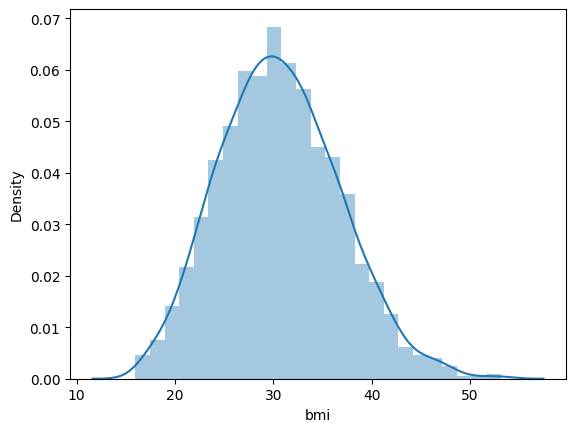

In [18]:
sns.distplot(df["bmi"])    ### to see graph

In [19]:
df.bmi.quantile([.001,.999])   

0.001    16.8150
0.999    51.8606
Name: bmi, dtype: float64

In [20]:
df[(df.bmi > 15) & (df.bmi < 50)].bmi.describe()   ## for Extra Acu

count    1325.000000
mean       30.597445
std         6.028871
min        15.960000
25%        26.220000
50%        30.300000
75%        34.580000
max        49.060000
Name: bmi, dtype: float64

In [21]:
df.bmi=df.bmi.fillna(30.302)

In [22]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     4
dtype: int64

In [23]:
df["charges"].describe()

count     1333.000000
mean     13281.717157
std      12122.099209
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      16657.717450
max      63770.428010
Name: charges, dtype: float64

<Axes: xlabel='charges', ylabel='Density'>

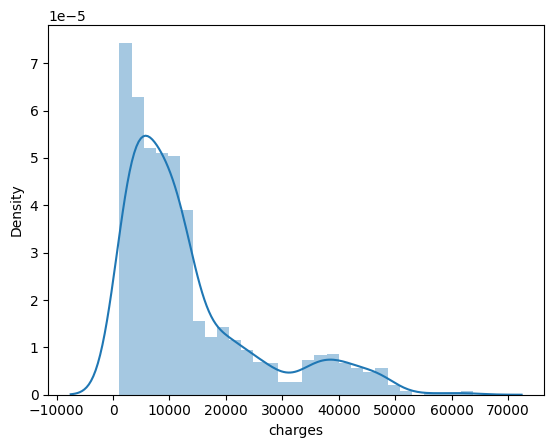

In [24]:
sns.distplot(df.charges)

In [25]:
df[(df.charges > 10) & (df.charges < 500500)].charges.describe()   ## for Extra Acu

count     1333.000000
mean     13281.717157
std      12122.099209
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      16657.717450
max      63770.428010
Name: charges, dtype: float64

In [26]:
df["charges"]= df.charges.fillna(9382.033)

In [27]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

***doesn't have any null values***

# Explorartory Data Analysis (EDA)

***Uniqueness***

In [28]:
# Loop through each column and count the number of distinct values
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

age: 47 distinct values
sex: 2 distinct values
bmi: 545 distinct values
children: 6 distinct values
smoker: 2 distinct values
region: 4 distinct values
charges: 1334 distinct values


## Visualization : Histogram of age distribution

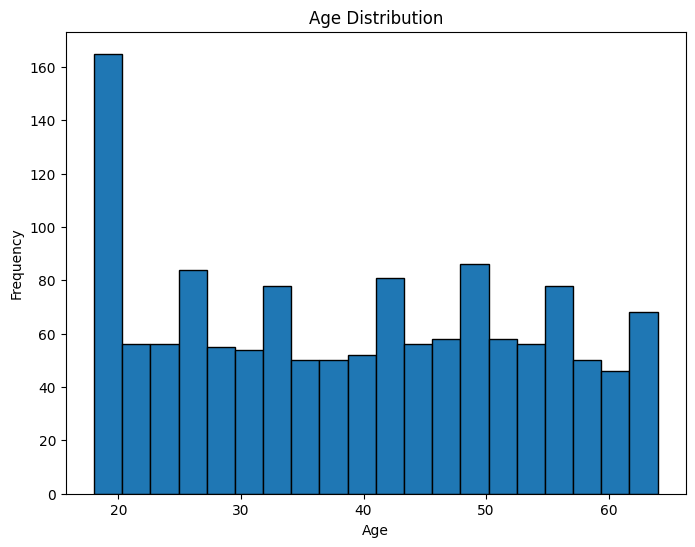

In [29]:
plt.figure(figsize=(8, 6))
plt.hist(df['age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

## Visualization : Bar plot of gender distribution

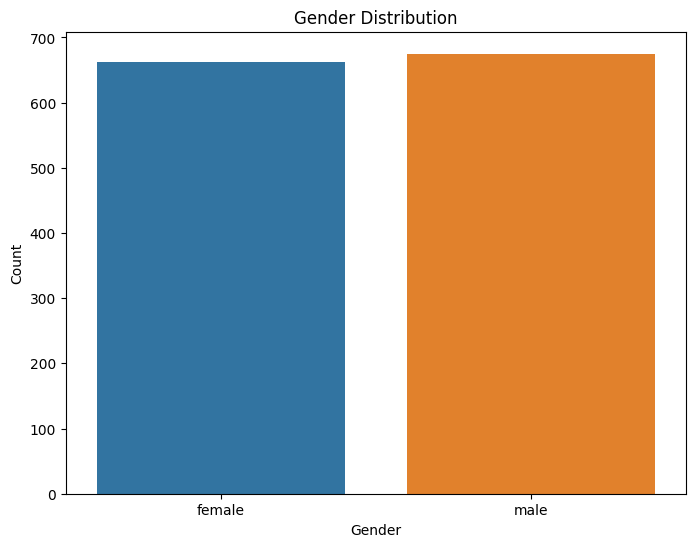

In [30]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='sex')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

## Visualization : Histogram of BMI values

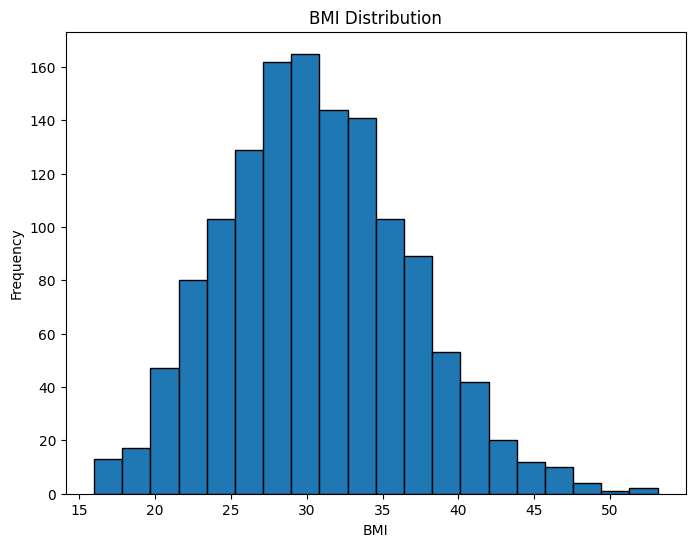

In [31]:
plt.figure(figsize=(8, 6))
plt.hist(df['bmi'], bins=20, edgecolor='black')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('BMI Distribution')
plt.show()

## Visualization : Bar plot of the number of children/dependents

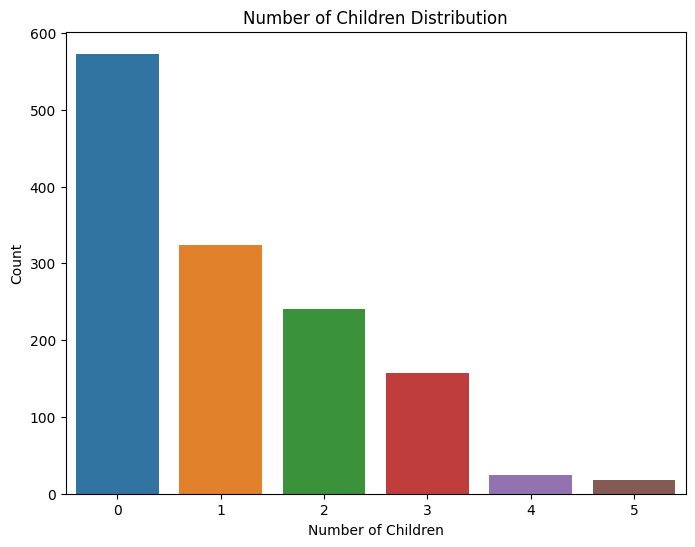

In [32]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='children')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.title('Number of Children Distribution')
plt.show()

## Visualization : Pie chart of smoker vs. non-smoker distribution

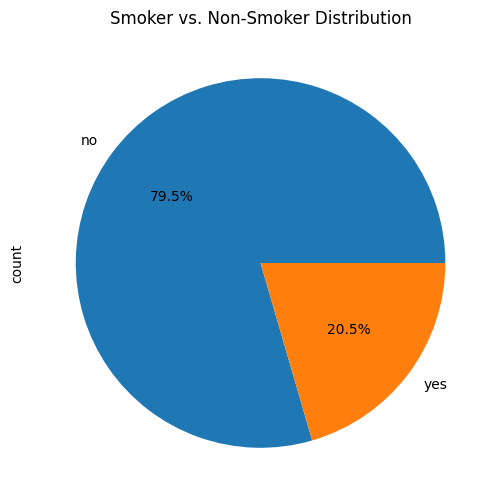

In [33]:
plt.figure(figsize=(8, 6))
df['smoker'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Smoker vs. Non-Smoker Distribution')
plt.show()

## Visualization : Bar plot of region distribution

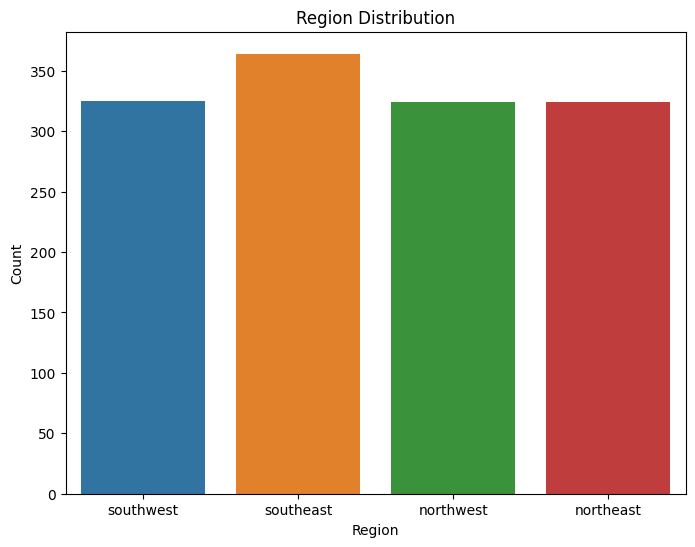

In [34]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Region Distribution')
plt.show()

## Visualization : Box plot of medical charges

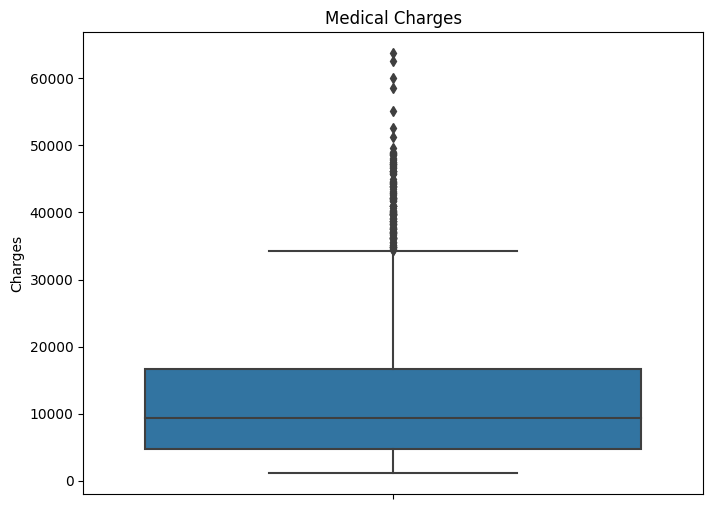

In [35]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='charges')
plt.ylabel('Charges')
plt.title('Medical Charges')
plt.show()

## Visualization : Scatter plot of age vs. charges

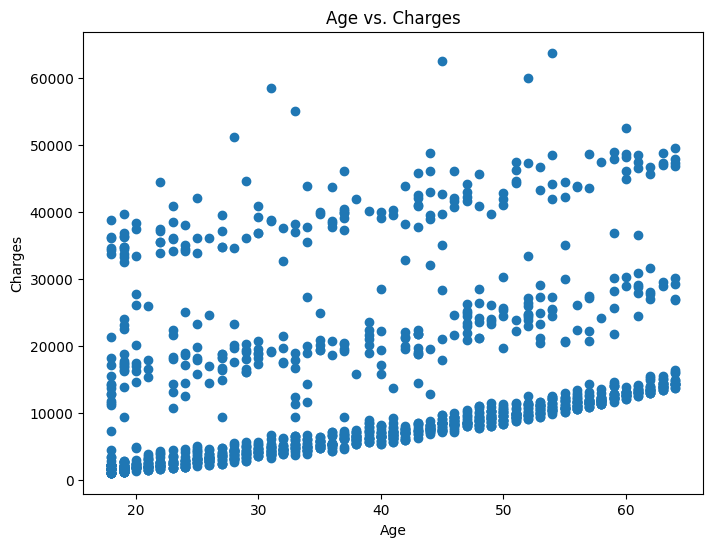

In [36]:
plt.figure(figsize=(8, 6))
plt.scatter(df['age'], df['charges'])
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs. Charges')
plt.show()

## Visualization : Scatter plot of BMI vs. charges

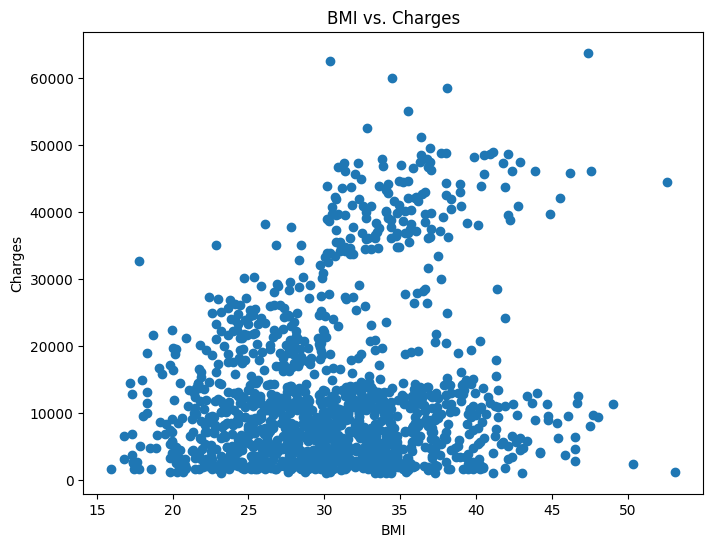

In [37]:
plt.figure(figsize=(8, 6))
plt.scatter(df['bmi'], df['charges'])
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('BMI vs. Charges')
plt.show()

## Visualization : Grouped bar plot of gender vs. charges

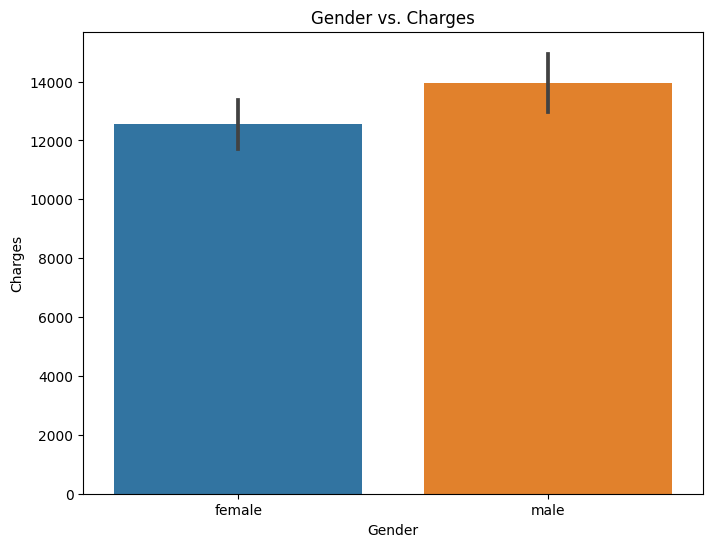

In [38]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='sex', y='charges')
plt.xlabel('Gender')
plt.ylabel('Charges')
plt.title('Gender vs. Charges')
plt.show()

## Visualization : Grouped bar plot of smoker vs. charges

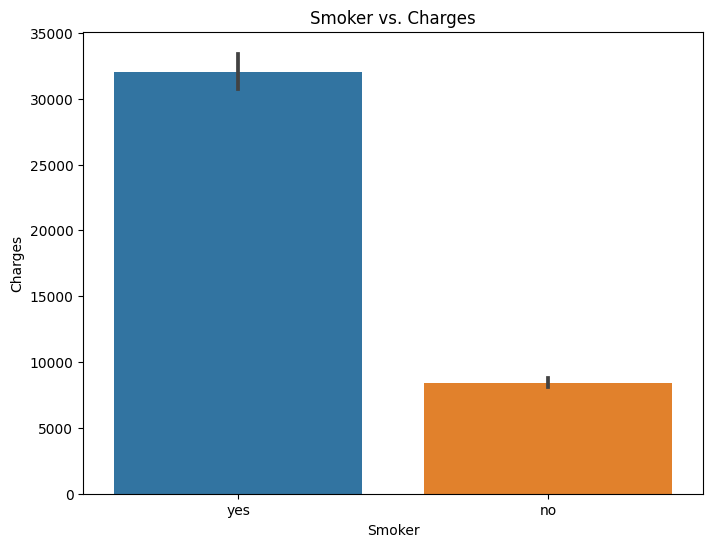

In [39]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='smoker', y='charges')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Smoker vs. Charges')
plt.show()

## Visualization : Stacked bar plot of region vs. charges

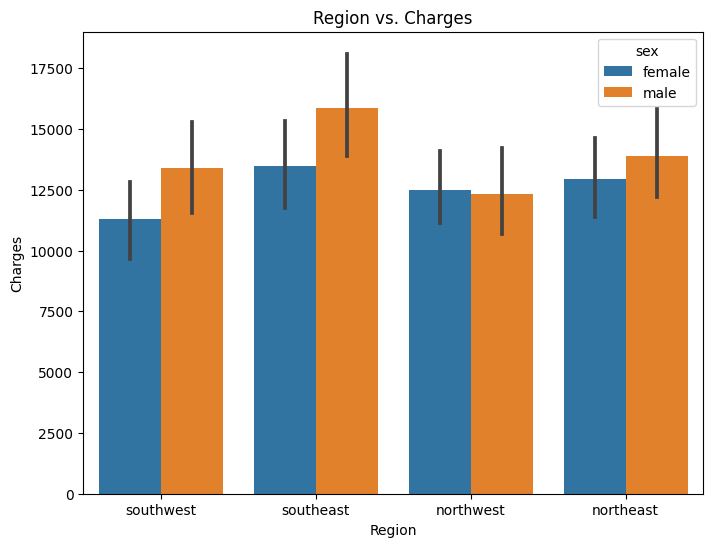

In [40]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='region', y='charges', hue='sex')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Region vs. Charges')
plt.show()

## Visualization : Line plot showing the average charges by age

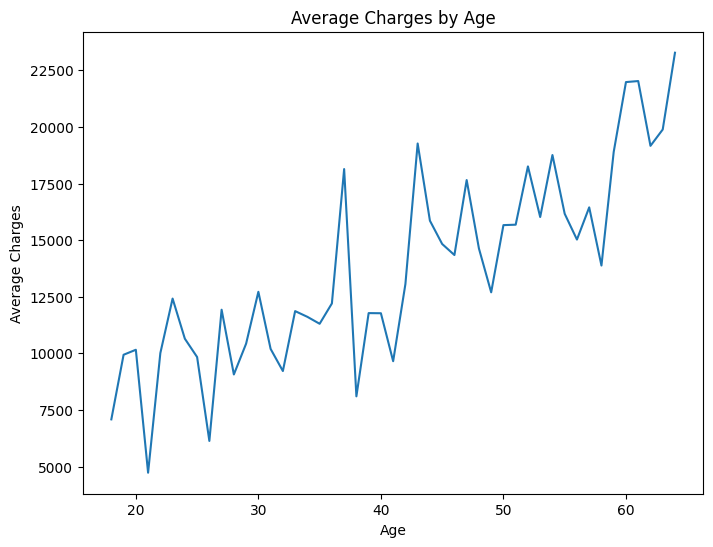

In [41]:
avg_charges_by_age = df.groupby('age')['charges'].mean()
plt.figure(figsize=(8, 6))
plt.plot(avg_charges_by_age.index, avg_charges_by_age.values)
plt.xlabel('Age')
plt.ylabel('Average Charges')
plt.title('Average Charges by Age')
plt.show()

## Visualization : Line plot showing the average charges by BMI

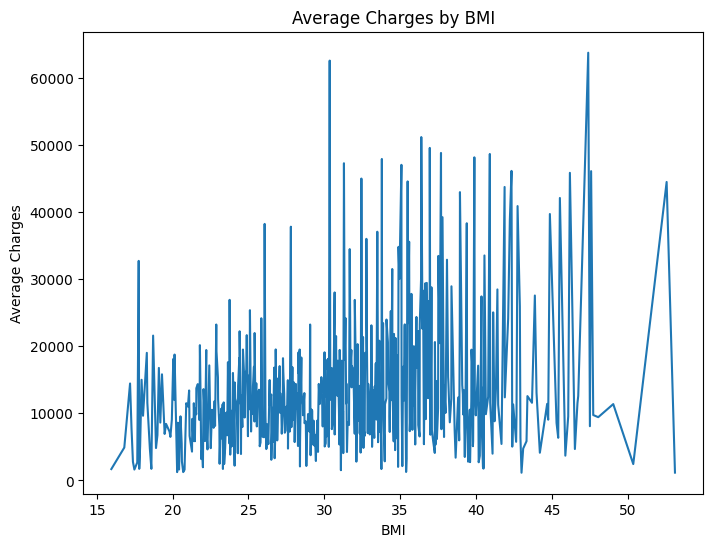

In [42]:
avg_charges_by_bmi = df.groupby('bmi')['charges'].mean()
plt.figure(figsize=(8, 6))
plt.plot(avg_charges_by_bmi.index, avg_charges_by_bmi.values)
plt.xlabel('BMI')
plt.ylabel('Average Charges')
plt.title('Average Charges by BMI')
plt.show()

## Visualization : Box plot of charges grouped by gender

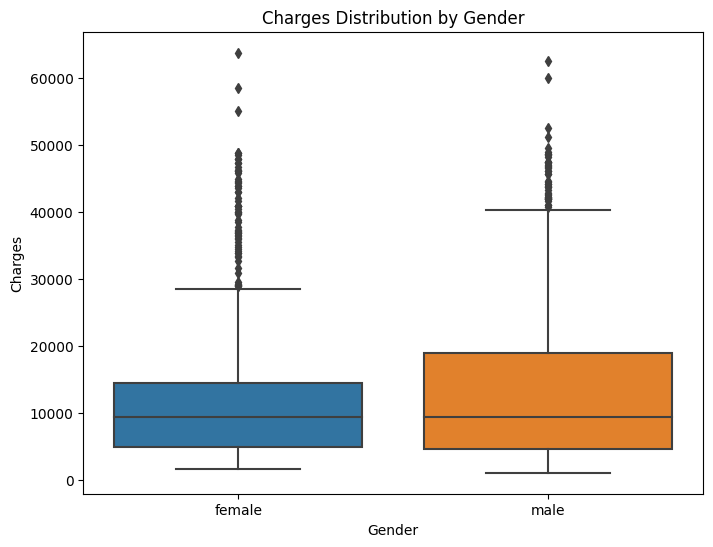

In [43]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='sex', y='charges')
plt.xlabel('Gender')
plt.ylabel('Charges')
plt.title('Charges Distribution by Gender')
plt.show()

## Visualization : Box plot of charges grouped by smoker vs. non-smoker

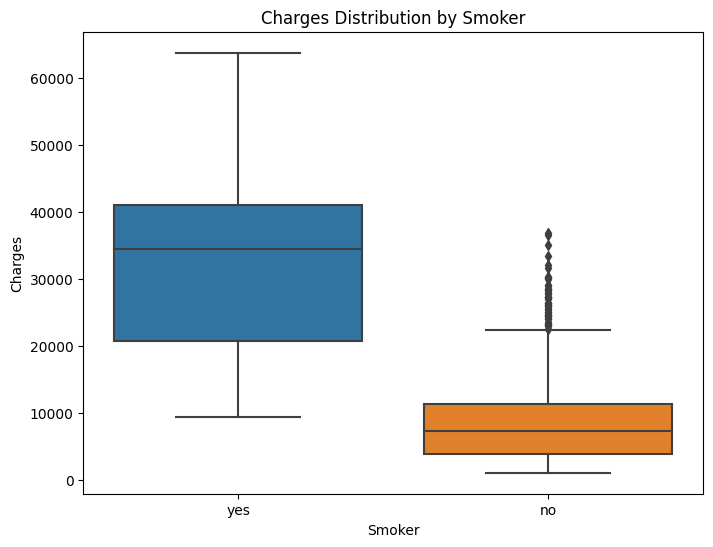

In [44]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='smoker', y='charges')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Charges Distribution by Smoker')
plt.show()

## Visualization : Box plot of charges grouped by region

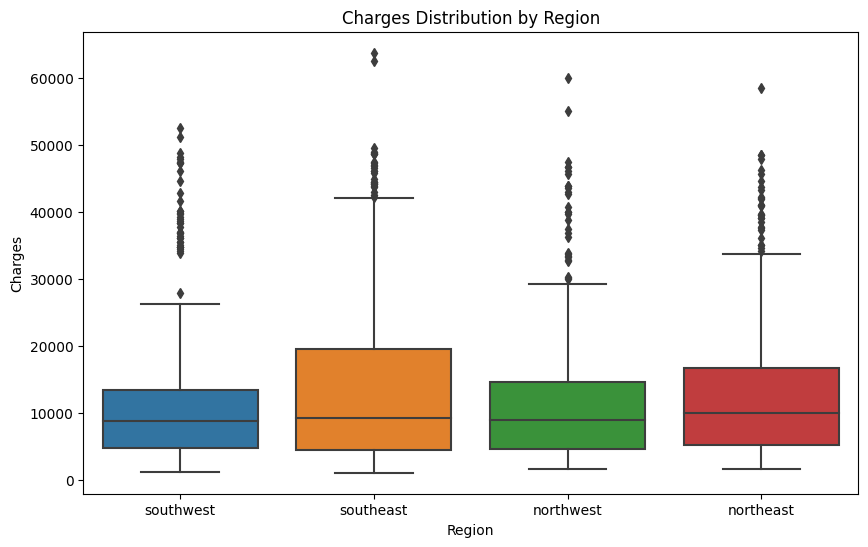

In [45]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='region', y='charges')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Charges Distribution by Region')
plt.show()

## Visualization : Violin plot of charges grouped by gender

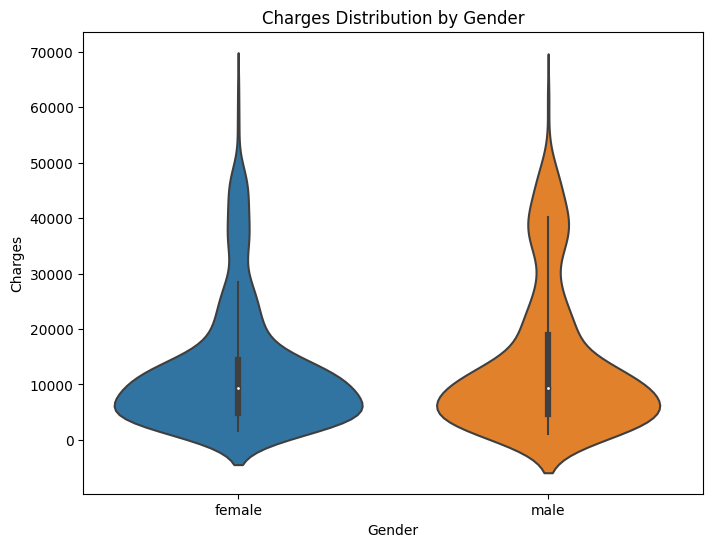

In [46]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='sex', y='charges')
plt.xlabel('Gender')
plt.ylabel('Charges')
plt.title('Charges Distribution by Gender')
plt.show()

## Visualization : Violin plot of charges grouped by smoker vs. non-smoker

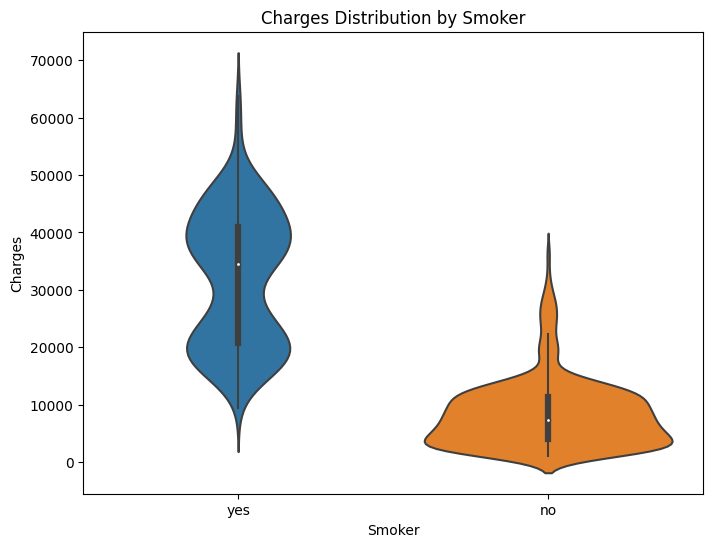

In [47]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='smoker', y='charges')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Charges Distribution by Smoker')
plt.show()

## Visualization : Violin plot of charges grouped by region

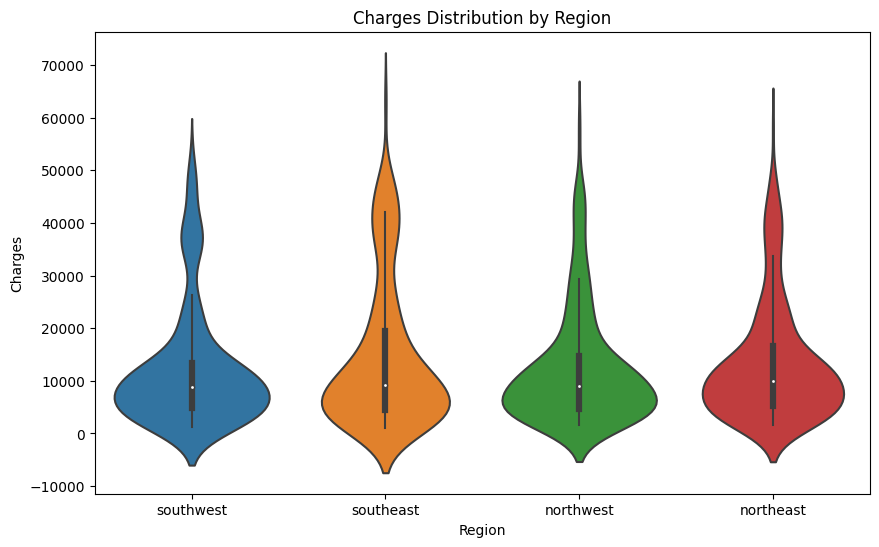

In [48]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='region', y='charges')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Charges Distribution by Region')
plt.show()

## Visualization : Swarm plot of charges grouped by region

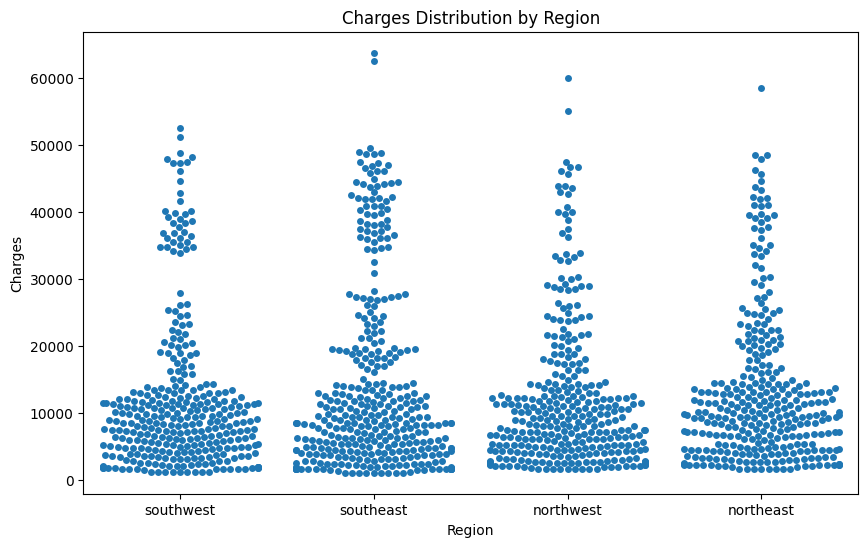

In [49]:
plt.figure(figsize=(10, 6))
sns.swarmplot(data=df, x='region', y='charges')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Charges Distribution by Region')
plt.show()

## Visualization : Box plot of charges grouped by the number of children

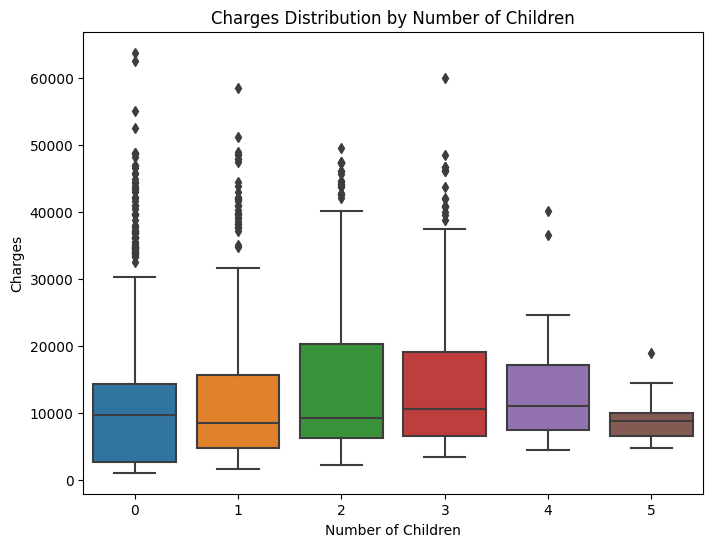

In [50]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='children', y='charges')
plt.xlabel('Number of Children')
plt.ylabel('Charges')
plt.title('Charges Distribution by Number of Children')
plt.show()

## Visualization : Bar plot of the average charges for different age groups

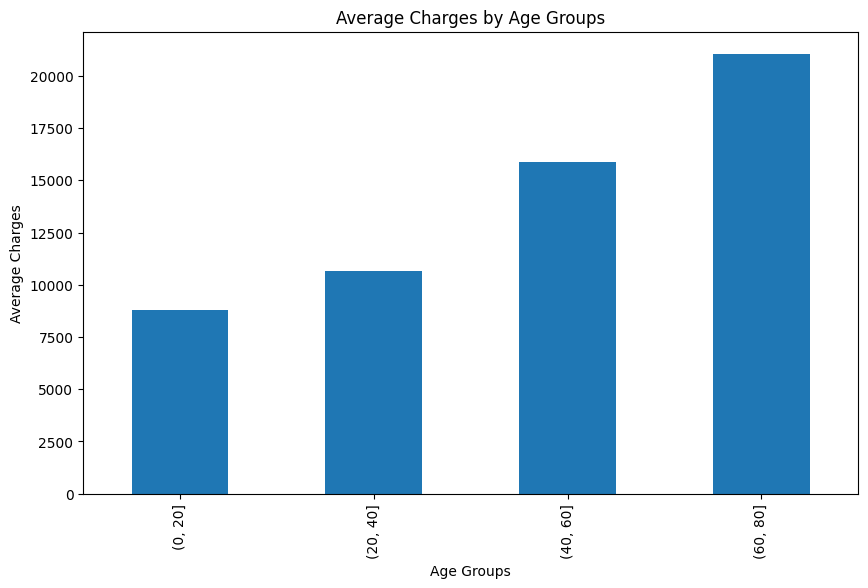

In [51]:
age_groups = pd.cut(df['age'], bins=[0, 20, 40, 60, 80])
avg_charges_by_age_groups = df.groupby(age_groups)['charges'].mean()
plt.figure(figsize=(10, 6))
avg_charges_by_age_groups.plot(kind='bar')
plt.xlabel('Age Groups')
plt.ylabel('Average Charges')
plt.title('Average Charges by Age Groups')
plt.show()

## Visualization : Bar plot of the average charges for different BMI ranges

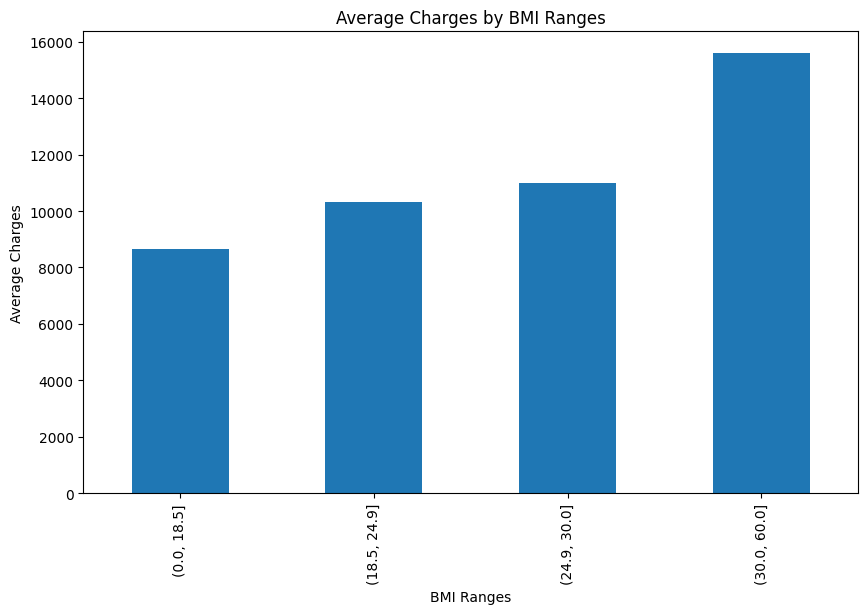

In [52]:
bmi_ranges = pd.cut(df['bmi'], bins=[0, 18.5, 24.9, 30, 60])
avg_charges_by_bmi_ranges = df.groupby(bmi_ranges)['charges'].mean()
plt.figure(figsize=(10, 6))
avg_charges_by_bmi_ranges.plot(kind='bar')
plt.xlabel('BMI Ranges')
plt.ylabel('Average Charges')
plt.title('Average Charges by BMI Ranges')
plt.show()

## Visualization : Pie chart of the percentage of smokers and non-smokers for each region

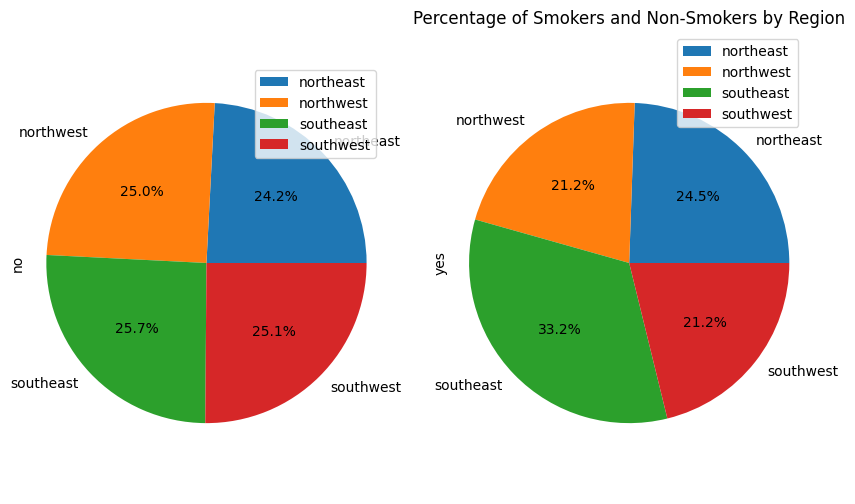

In [53]:
region_smoker_counts = df.groupby(['region', 'smoker']).size().unstack()
region_smoker_counts.plot(kind='pie', figsize=(10, 6), autopct='%1.1f%%', subplots=True)
plt.legend(loc='upper right')
plt.title('Percentage of Smokers and Non-Smokers by Region')
plt.axis('equal')
plt.show()

##  Pair plot with hue

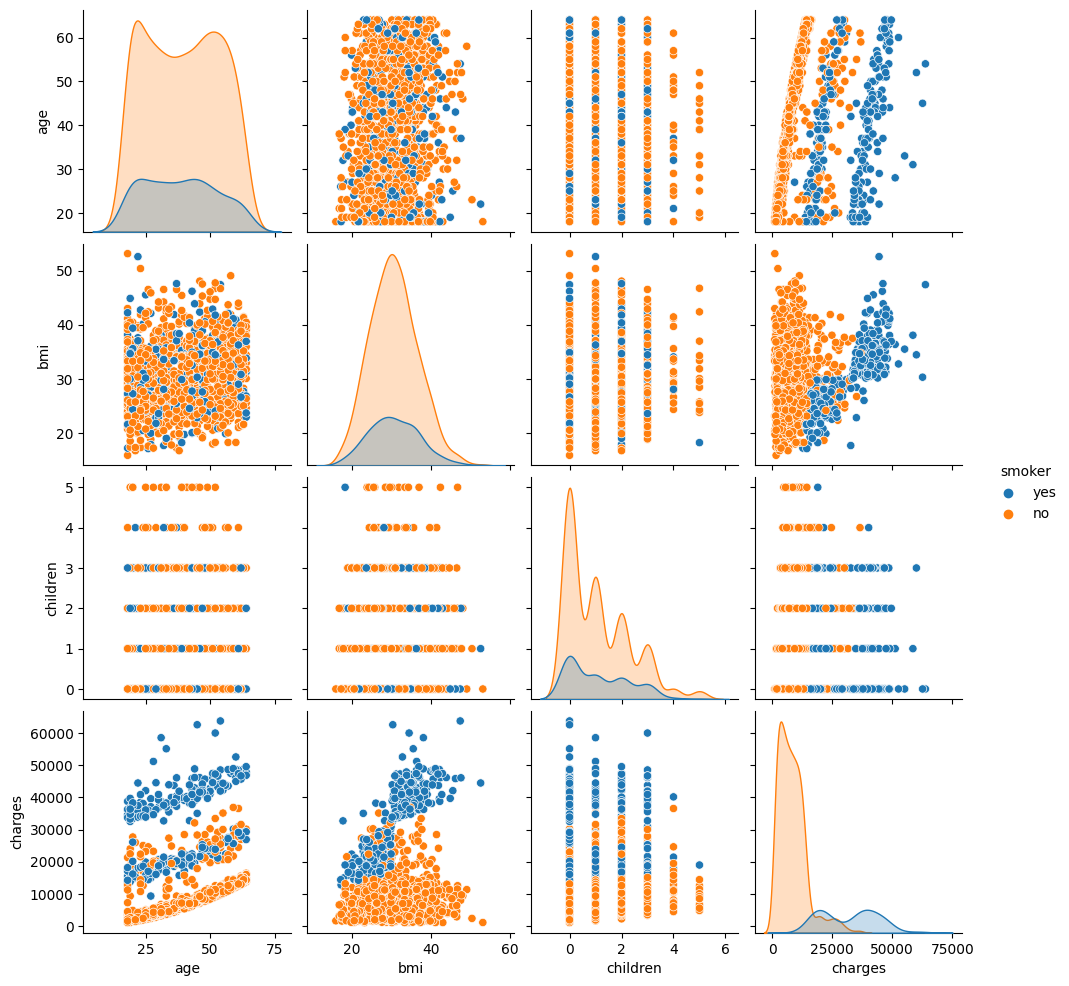

In [54]:
sns.pairplot(df, hue='smoker')
plt.show()

##  3D scatter plot

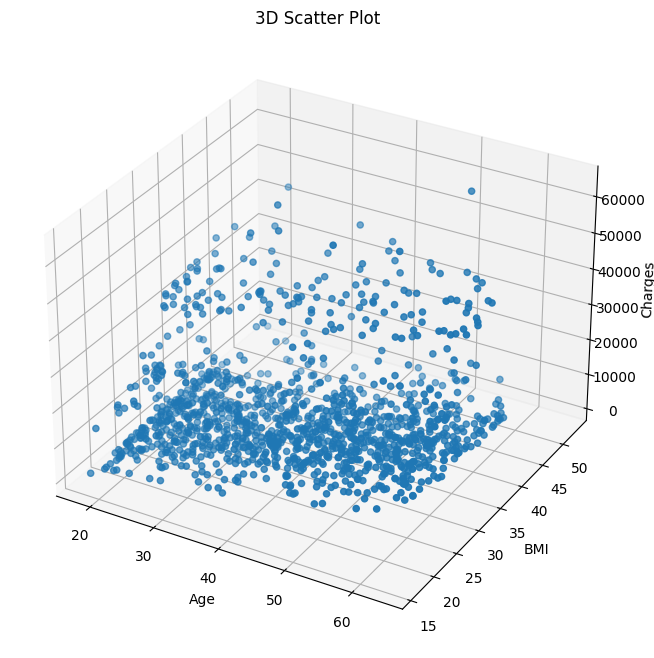

In [55]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['age'], df['bmi'], df['charges'])
ax.set_xlabel('Age')
ax.set_ylabel('BMI')
ax.set_zlabel('Charges')
plt.title('3D Scatter Plot')
plt.show()

# Modeling

In [56]:
categorical_cols = ["sex","smoker","region"]
encoder = OneHotEncoder(drop="first",sparse= False)   ####OneHotEncoder for categorical col
encoder_cols = pd.DataFrame(encoder.fit_transform(df[categorical_cols]),columns = encoder.get_feature_names_out(categorical_cols))

In [57]:
encoder_cols

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
1332,1.0,0.0,1.0,0.0,0.0
1333,0.0,0.0,0.0,0.0,0.0
1334,0.0,0.0,0.0,1.0,0.0
1335,0.0,0.0,0.0,0.0,1.0


In [58]:
num_cols = ["age","children","bmi"]
scaler = StandardScaler()       ##### StandardScaler for numarical col
scaled_cols = pd.DataFrame(scaler.fit_transform(df[num_cols]),columns = (num_cols))

In [59]:
scaled_cols

,age,children,bmi
0,-1.440418,-0.909234,-0.450877
1,-1.511647,-0.079442,0.513804
2,-0.799350,1.580143,0.387261
3,-0.443201,-0.909234,-1.304627
4,-0.514431,-0.909234,-0.289823
...,...,...,...
1332,0.767704,1.580143,0.053649
1333,-1.511647,-0.909234,0.209773
1334,-1.511647,-0.909234,1.019973
1335,-1.297958,-0.909234,-0.795992


In [60]:
x= pd.concat([encoder_cols,scaled_cols], axis=1)
y= df["charges"]

In [61]:
x

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age,children,bmi
0,0.0,1.0,0.0,0.0,1.0,-1.440418,-0.909234,-0.450877
1,1.0,0.0,0.0,1.0,0.0,-1.511647,-0.079442,0.513804
2,1.0,0.0,0.0,1.0,0.0,-0.799350,1.580143,0.387261
3,1.0,0.0,1.0,0.0,0.0,-0.443201,-0.909234,-1.304627
4,1.0,0.0,1.0,0.0,0.0,-0.514431,-0.909234,-0.289823
...,...,...,...,...,...,...,...,...
1332,1.0,0.0,1.0,0.0,0.0,0.767704,1.580143,0.053649
1333,0.0,0.0,0.0,0.0,0.0,-1.511647,-0.909234,0.209773
1334,0.0,0.0,0.0,1.0,0.0,-1.511647,-0.909234,1.019973
1335,0.0,0.0,0.0,0.0,1.0,-1.297958,-0.909234,-0.795992


In [62]:
y

0       16884.9240
1        1725.5523
2        4449.4620
3        9382.0330
4        3866.8552
           ...    
1333    10600.5483
1334     2205.9808
1335     1629.8335
1336     2007.9450
1337    29141.3603
Name: charges, Length: 1337, dtype: float64

In [63]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state= 42)

In [64]:
model = LinearRegression()
model.fit(x_train,y_train)     #### model is variable (we can give any name)

LinearRegression()

In [65]:
y_pred = model.predict(x_test)

In [66]:
mae= mean_absolute_error(y_test,y_pred)
mse= mean_squared_error(y_test,y_pred)
rmse= np.sqrt(mse)
r2= r2_score(y_test,y_pred)

In [67]:
print("Mean Absolute Error",mae)
print("Mean square Error",mse)
print("Root Mean Square Error",rmse)
print("R2 Score",r2)

Mean Absolute Error 4223.552712390865
Mean square Error 36294725.60623369
Root Mean Square Error 6024.510403861354
R2 Score 0.8022859794262436


In [68]:
model.coef_

array([ -131.05440042, 23077.94891493,  -466.15845485,  -881.89184192,
        -691.78791812,  3483.28928178,   662.37970994,  1961.90375732])

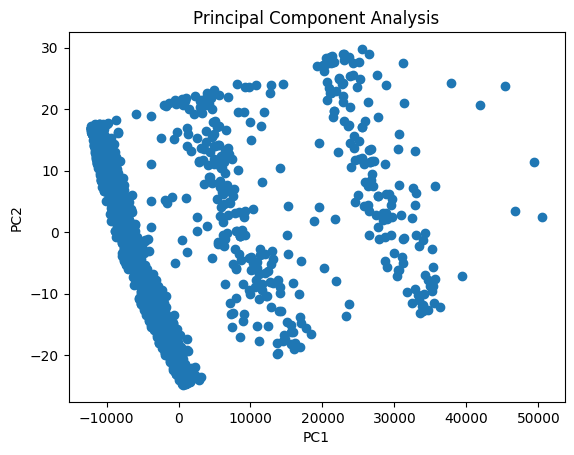

In [69]:
# Principal Component Analysis (PCA)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df[['age', 'bmi', 'charges']])
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
plt.scatter(df_pca['PC1'], df_pca['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Principal Component Analysis')
plt.show()

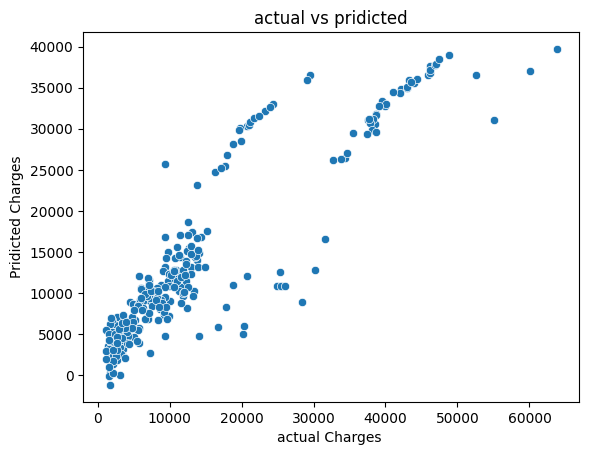

In [70]:
sns.scatterplot(x=y_test,y=y_pred)
plt.xlabel("actual Charges ")
plt.ylabel("Pridicted Charges")
plt.title("actual vs pridicted")
plt.show()

# Tuning

In [71]:
lr_model= LinearRegression()
lr_scores = cross_val_score(lr_model , x_train , y_train , cv = 5) # use scoring method f1 macro or neg_mean_sqaured_eror

In [72]:
ridge_model= Ridge(alpha=1.0)
ridge_scores = cross_val_score(ridge_model , x_train , y_train , cv = 5) # use scoring method f1 macro or neg_mean_sqaured_eror

In [73]:
Lasso_model= Lasso(alpha=1.0)
Lasso_scores = cross_val_score(Lasso_model , x_train , y_train , cv = 5) # use scoring method f1 macro or neg_mean_sqaured_eror

In [74]:
lr_model.fit(x_train , y_train)
lr_prediction = lr_model.predict(x_test)
lr_mae = mean_absolute_error(y_test , lr_prediction)
lr_mse = mean_squared_error(y_test ,lr_prediction)
lr_r2 = r2_score(y_test,lr_prediction)

In [75]:
print('Linear MAE',lr_mae)
print('Linear MSE',lr_mse)
print('Linear R2',lr_r2)

Linear MAE 4223.552712390865
Linear MSE 36294725.60623369
Linear R2 0.8022859794262436


In [76]:
Lasso_model.fit(x_train , y_train)
Lasso_prediction = Lasso_model.predict(x_test)
Lasso_mae = mean_absolute_error(y_test ,Lasso_prediction)
Lasso_mse = mean_squared_error(y_test ,Lasso_prediction)
Lasso_r2 = r2_score(y_test ,Lasso_prediction)

In [77]:
print('Lasso MAE',Lasso_mae)
print('Lasso MSE',Lasso_mse)
print('Lasso R2',Lasso_r2)

Lasso MAE 4224.1911772867215
Lasso MSE 36309673.822134845
Lasso R2 0.8022045496367396


In [78]:
ridge_model.fit(x_train , y_train)
ridge_prediction = ridge_model.predict(x_test)
ridge_mae = mean_absolute_error(y_test ,ridge_prediction)
ridge_mse = mean_squared_error(y_test ,ridge_prediction)
ridge_r2 = r2_score(y_test ,ridge_prediction)

In [79]:
print('Lasso MAE',ridge_mae)
print('Lasso MSE',ridge_mse)
print('Lasso R2',ridge_r2)

Lasso MAE 4239.956339201275
Lasso MSE 36474602.29247159
Lasso R2 0.8013061085979194


# PLOT FOR ALL

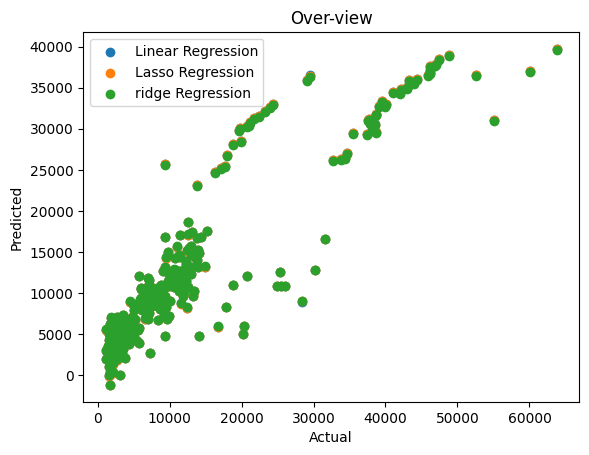

In [80]:
plt.scatter(y_test , lr_prediction , alpha=1.0,  label='Linear Regression')
plt.scatter(y_test , Lasso_prediction , alpha=1.0 , label='Lasso Regression')
plt.scatter(y_test , ridge_prediction , alpha=1.0 , label='ridge Regression')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Over-view')
plt.legend()